# 논문 검색

- https://paperswithcode.com

# RNN 정리

- 순환 신경망(Recurrent Neural Network)
- RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 가진다.(2군데로 보낸다.)
- 피드 포워드 신경망(Feed Forward Neural Network)
  - 일반적으로 신경망에서 은닉층에서 활성화 함수를 지난 출력값은 출력층으로만 간다. -> 순방향

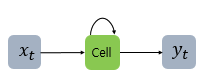

In [1]:
from IPython.display import Image

Image('/content/rnn_f_0.png', width=200)

- 그림 설명
  - x는 입력층의 입력 벡터
  - y는 출력층의 출력 벡터
  - 실제 수식에서는 편향값 b도 존재하나 그림에서 생략
  - cell: 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할 담당. 이전값의 값을 기억하려는(t-1를 입력으로 받는다.) 메모리 역할도 담당하므로 메모리 셀이라고, RNN Cell이라고 표현
  - 메모리 셀은 각각의 시점(time step)에서 이전 시점에서 들어온 값(이전 시점의 은닉층의 메모리 셀에서 나온 값)을 자신의 입력값으로 사용하는 재귀적인 활동을 수행한다.
  - 현재 시점 t
  - 현재 시점 t에서 현재 시점의 메모리 셀이 가진 값은 과거의 메모리 셀의 값들의 영향을 받는다.
  - 메모리 셀이 출력층 방향으로 혹은 다음 시점(t+1)로 내보내는 값 = 은닉 상태(hidden state)

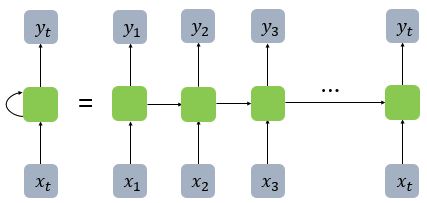

In [2]:
Image('/content/rnn_f_1.png', width=400)

- 그림 설명
  - 좌측
    - 사이클을 표현하는 화살표를 사용하여서 표현
    - 재귀형태
  - 우측
    - 여러 시점(time step)을 기준으로 펼쳐서 표현
    - 시간의 흐름에 따라 표현

- 요약
  - 입력층 -> 입력 벡터
  - 출력층 -> 출력 벡터 
  - 은닉층 -> 은닉 상태
  - 위 그림의 모든 사각형 박스는 벡터를 표현

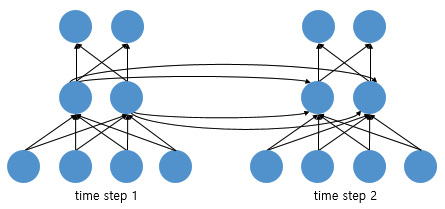

In [3]:
Image('/content/rnn_f_2.png', width=400)

- 그림 
  - 입력 벡터 차원의 4
  - 은닉 상태 크기의 2
  - 출력 벡터 차원이 2

- RNN의 망구성 방식
  - 하나의 입력에서 여러개 출력(one-to-many)
    - 이미지 캡셔닝, 하나의 이미지 입력에 대해서 제목(단어들의 나열 -> 시퀀스), 내용을 출력하는 작업
  - 여러개 입력에서 하나의 출력(many-to-one)
    - 입력 문서가 긍정적인지 부정적인지 판별 : 감성분류(sentiment classification)
    - 스팸 메일 분류
  - 다-대-다 (many-to-many)
    - 입력문장에 대해 다-대-다 문장을 만들어준다. -> 챗봇
    - 입력문장으로부터 번역된 문장을 출력 -> 기계번역
    - 입력대비 동시에 출력되는 방식, 입력 후 망 후반에서 출력이 되는 방식


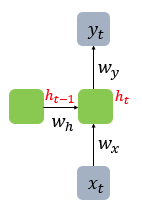

In [4]:
Image('/content/rnn_f_3.png', width=200)

- 그림 설명
  - 현재 시점 -> t
  - 현재 시점의 은닉 상태 -> ht
  - ht를 계산하기 위해서 2개의 입력이 필요하고, 각각의 입력에는 2개의 가중치(w)가 필요하다.
    - 하나는 현재 시점의 입력층을 위한 가중치 Wx
    - 또 하나는 이전 시점의 은닉 상태값 ht-1을 위해 사용한 가중치 Wh
  - 식
    - 메모리 셀, 은닉 상태 : ht = tanh(WxXt + WhHt-1 + b(2종류를 통틀어서 표현))
    - 출력층 : Yt = 활성화함수(Wyht + b)

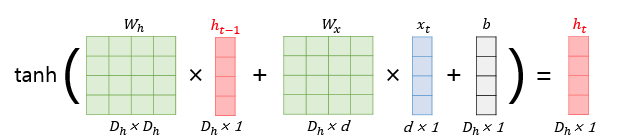

In [5]:
Image('/content/rnn_f_5.png', width=600)

- BPTT(Backpropagation through time)
  - RNN은 전체 시점에 대해서 네트워크를 펼친 다음 역전파를 이용하여 모든 시점의 가중치 공유
  - 절차
    - 순전파를 통해서 모든 시점에 대한 시퀀스를 출력
    - 각 시점의 손실(loss)을 보고, 가중치(w)를 보정한다.

- 깊은 순환 신경망(Deep RNN)
    - 순환 신경망에서 은닉층이 1개 더 추가되었다. 이를 통해 deep을 표현
    - cell을 하나 더 추가
    - 학습 능력 향상

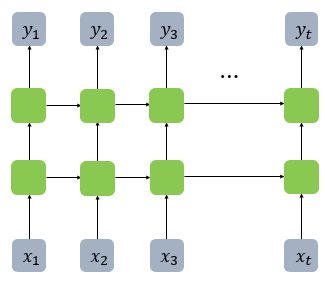

In [6]:
Image('/content/rnn_f_6.png', width=300)

- 양방향 순환 신경망(Bidirectional RNN)
    - 시점 t에서 출력값을 예측할 때, 이전 시점의 데이터 뿐만 아니라 이후 데이터(미래)로 출력값을 예측할 수 있다 라는 가정
    - 실제로도 과거 시점의 데이터를 참고하여 정답을 주로 예측하지만 특정 문제에 대해서 미래의 값이 어떤 단서가 되기도 한다.
    - 결론
        - 이전 시점의 데이터 + 이후 시점의 데이터를 활용하여 종합적으로 예측(출력)

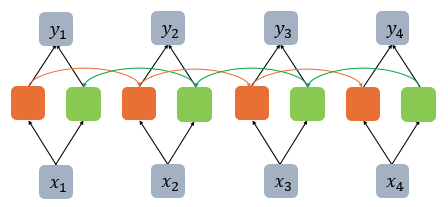

In [7]:
Image('/content/rnn_f_7.png', width=400)

- 그림 설명
    - 2개의 메모리 셀을 사용
    - 첫번째 셀
        - 주황색
        - 앞 시점(t-1)의 은닉 상태(hidden state)를 전달받아서 은닉 상태를 계산
    - 두번째 셀
        - 초록색
        - 뒤 시점(t+1)의 은닉 상태(hidden state)를 전달받아서 은닉 상태를 계산
    - 두 개의 값을 이용하여 출력층의 출력값을 예측 시 사용한다.

- 양방향 깊은 순환 신경망(Bidirectional RNN)
    - 양방향 순환 신경망에 deep을 더한 것

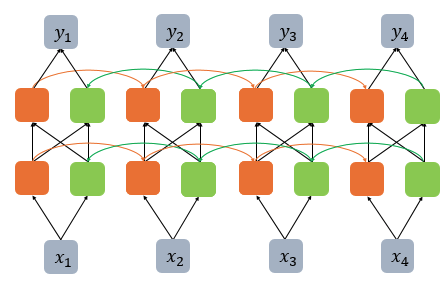

In [8]:
Image('/content/rnn_f_8.png', width=400)

In [9]:
!pip install konlpy

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.0.1-20150920.tar.gz
!tar -zxvf mecab-ko-dic-2.0.1-20150920.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.0.1-20150920')
!./autogen.sh
!./configure
!make
# !sh -c 'echo "dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic" > /usr/local/etc/mecabrc'
!make install

os.chdir('/content')

!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')

!python3 setup.py build
!python3 setup.py install

     |████████████████████████████████| 19.4MB 220kB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 2.3MB 39.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
     |████████████████████████████████| 92kB 2.7MB/s 
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp36-cp36m-linux_x86_64.whl size=2696353 sha256=197bec60bc8fb27fc53fd77578da5760102b375d66fe464d6306947a923beee8
  Stored in directory: /root/.cache/pip/wheels/52/37/1f/1015d908d12a0e9b239543d031fda0cded9823aa1306939541
Successfully built JPype1-py3
Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  I

# 영화 댓글을 이용한 감성 분류

- 최종 산출물 : 댓글을 작성하여 입력하면 긍정/부정을 판단해 준다.
- 학습할 때 -> 노트를 GPU로 변경하고 수행

# 1. 패키지 로드

In [0]:
# 엔진, 행렬 연산
import torch

# 층 생성, 활성화, 최적화, 손실함수 등
import torch.nn as nn
import torch.optim as optim

# 텍스트 로드, 전처리 용
from torchtext.data import Field, TabularDataset, Iterator

# 형태소 분석기(한글)
from konlpy.tag import Mecab

# 2. 데이터 로드 및 전처리

- torchtext의 데이터 전처리 절차를 수행하는 클래스
    - 데이터 정의
    - 데이터셋 구성
    - 사전(단어장) 생성
    - 데이터 로더 생성

In [0]:
class MySentenceField():
    def __init__(self, src, format, batch_size):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        self.initField()
        self.initData(src, format)
        self.createVoca()
        self.initLoader(batch_size)

    def initField(self):
        self.mecab = Mecab()

        # 데이터들은 긍정, 부정이 모두 섞여 있다.(훈련용, 테스트용)
        # 데이터들은 컬럼이 모두 3개 이므로 3개의 Field를 준비한다. -> 컬럼별 데이터와 대응
        self.TEXT = Field(
                        sequential=True,
                        use_vocab=True,
                        tokenize=self.mecab.morphs,
                        lower=True,
                        batch_first=True
                    )

        self.LABEL = Field(
                        sequential=False,
                        use_vocab=False,
                        batch_first=True,
                        preprocessing=lambda x: int(x),
                        is_target=True
                    )

        self.ID = Field(
                        sequential=False,
                        use_vocab=False,
                        is_target=False
                    )

    def initData(self, src, format):
        # src가 (훈련용 데이터 파일명, 테스트용 데이터 파일명) 으로 변경되서 전달된다.
        self.train_data, self.test_data = TabularDataset.splits(
                                              path='/content', 
                                              format=format,  # tsv
                                              train=src[0],   # ratings_train.txt
                                              test=src[1],    # ratings_test.txt
                                              fields=[('id', self.ID), ('text', self.TEXT), ('label', self.LABEL)],
                                              skip_header=True
                                          )
    
    def createVoca(self):
        # self.train_data에 존재하는 중복되지 않는 형태소를 기준으로 사전을 생성
        # self.TEXT.build_vocab(self.train_data)

        # min_freq : 형태소가 최소 2번 이상 나오는 것만 사전으로 등재 -> 정확도 up, 연산속도 up
        self.TEXT.build_vocab(self.train_data, min_freq=2)
    
    def initLoader(self, batch_size):
        # 5. 학습/평가 단계에서 사용
        # 훈련용 데이터는 모델이 훈련(학습) 시 주입하여 사용
        self.train_loader = Iterator(
                                dataset=self.train_data,
                                batch_size=batch_size,
                                device=self.device,
                            )
        
        # 테스트 데이터는 모델이 테스트할 때 주입하여 사용
        self.test_loader = Iterator(
                                dataset=self.test_data,
                                batch_size=batch_size,
                                device=self.device,
                            )
    
    def test(self):
        print('사전의 토큰 개수', len(self.TEXT.vocab))
        for idx in range(len(self.TEXT.vocab)):
            print(idx, self.TEXT.vocab.itos[idx], end=', ')

    def encode(self, src):
        return self.TEXT.process([self.mecab.morphs(src)]).to(self.device)

    def decode(self, src):
        return ' '.join([self.TEXT.vocab.itos[idx] for idx in src])

    def splitTrainTarget(self, src):
        oriData = self.encode(src)
        x_raw = oriData.squeeze().tolist()[:-1]
        t_raw = oriData.squeeze().tolist()[1:]
        x = torch.LongTensor(x_raw).unsqueeze(0)
        t = torch.LongTensor(t_raw).unsqueeze(0)

        return x, t

In [0]:
# 임계값, 실험치, 환경 변수
DATA_SRC = ['ratings_train.txt', 'ratings_test.txt']
DATA_FMT = 'tsv'
BATCH_SIZE = 256    # 한 번 주입 시 256개씩 처리
STEP = 10           # 훈련 반복 횟수

# 데이터 로드 생성
dataMgr = MySentenceField(DATA_SRC, DATA_FMT, BATCH_SIZE)

In [13]:
# 수치 확인
dataMgr.train_loader.batch_size, len(dataMgr.train_loader.dataset), len(dataMgr.test_loader.dataset)

(256, 150000, 50000)

In [14]:
# 사전의 수
len(dataMgr.TEXT.vocab)

29974

# 3. 신경망 구축

- RNN대신 LSTM으로 Cell을 구성하겠다.
- Deep RNN을 하겠다. -> 층의 개수 -> 층 * Cell
- 양방향 RNN을 하겠다. -> 2개의 Cell

In [0]:
class SentenceClf(nn.Module):
    # 각 층을 생성하는 객체 생성
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, output_size, batch_first=True, bidirect=True):
        # 부모 생성자 호출(상황따라 다르다.)
        super(SentenceClf, self).__init__()

        # 수치 저장
        self.n_layers = num_layers              # deep의 크기, 여기서는 3
        self.n_direct = 2 if bidirect else 1    # 양방향: 2, 단방향: 1
        self.hidden_size = hidden_size          # 은닉층 크기

        # 층 생성 객체 생성

        # 1. 임베딩
        # 임베딩(사전의 수(형태소의 수) : 29974, embed_size : 128)
        # 행 : 사전의 형태소, 열 : 임베딩 크기로 표현된 형태소의 수치값
        self.embedding_layer = nn.Embedding(vocab_size, embed_size)
        
        # 2. Cell
        # RNN Cell, LSTM Cell, GRU Cell 등이 존재한다. 은닉 상태를 처리하는 것
        # LSTM Cell : cell state를 처리하는 틀, 형태, 박스 등 전체를 포괄하는 의미
        # LSTM : RNN의 단점을 보완하기 위해서 나온 알고리즘
        '''
            LSTM Cell 에서는 gate가 존재하여 입력값을 3개의 형태로 비율을 조절하여 처리
            - Ft : Forget gate -> 신규로 추가
                - 데이터 중 잊혀져야 할 비율로 처리
            - It : Input gate
                - 새로운 입력으로 사용할 비율로 처리
            - Ot : Ouput gate
                - 은닉층으로 가져가야 할 비율로 처리

            LSTM : 단점(RNN의 경사소실 문제를 해결, 시퀀스가 길어지면 t의 입장에서 초기의 데이터(예 : t-1000)) 값이
                현재 시점 t에 미치는 영향은 점점 희미해진다. 
                -> 역전파로 최적화 수행 시 최초 입력까지 도달하지 못하는 문제
                -> Ft는 망각할 정보를 처리해서 -> 향후 역전파에서 초기값까지 잘 도달할 수 있게 통로 역할을 해준 것이다.
            
            GRU는 LSTM의 파라미터를 줄였다.(개선, 1 - 값)
        '''
        self.rnn_layer = nn.LSTM(input_size=embed_size,     # 임베딩 층의 형태소의 크기를 입력으로 세팅
                                 hidden_size=hidden_size,   # 은닉층의 크기, 개수
                                 num_layers=num_layers,     # Deep RNN의 층 개수
                                 batch_first=batch_first,   # batch_first의 값(True, False)
                                 bidirectional=bidirect)    # 양방향 순환 신경망 설정
        # 선형처리
        # 양방향: 2 * hidden_size, 단방향: 1 * hidden_size
        self.linear_layer = nn.Linear(self.n_direct * self.hidden_size, output_size)
    
    # 양방향, deep하게 전개하는 것을 기준으로 각 층을 설계하고 연결
    def forward(self, x):
        # 입력 x를 받아서 임베딩층에 바인딩
        # embeded -> train: (150000, 128), test: (50000, 128)
        embeded = self.embedding_layer(x)

        # 2개 필요
        # (입력 데이터 x의 batch 사이즈, 은닉층의 크기, GPU or CPU)
        hidden, cell = self.init_hiddens(x.size(0), self.hidden_size, x.device) 

        # LSTM Cell에 2개의 은닉층이 들어와야 한다.(그림)
        # 6개의 셀이 2세트씩 3겹으로 표현
        output, (hidden, cell) = self.rnn_layer(embeded, (hidden, cell))

        # 선형층에 쌓기 위해 처리
        # 마지막 2세트만 쌓아서 선형으로 보낸다.
        last_hidden = torch.cat([list_h for list_h in hidden[-self.n_direct:]], dim=1)

        # 선형층 통과
        lin_data = self.linear_layer(last_hidden)

        return lin_data.view(-1)

    # 사용자 정의 함수
    # 양방향 -> cell이 2개이다. deep -> 셀이 여러겹이다.
    def init_hiddens(self, batch_size, hidden_size, device):
        # (은닉층의 총 개수 : 층 수(3) * 방향 수(2), x에서 전달되는 데이터의 개수(batch_size)
        # or 층에서 층으로 전될될 데이터의 개수)
        hidden = torch.Tensor(self.n_layers * self.n_direct, batch_size, hidden_size)
        cell = torch.Tensor(self.n_layers * self.n_direct, batch_size, hidden_size)

        return hidden.to(device), cell.to(device)
        # return hidden, cell

In [0]:
# no comment version
class SentenceClf(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, output_size, batch_first=True, bidirect=True):
        super(SentenceClf, self).__init__()
        self.n_layers = num_layers
        self.n_direct = 2 if bidirect else 1
        self.hidden_size = hidden_size
        self.embedding_layer = nn.Embedding(vocab_size, embed_size)
        self.rnn_layer = nn.LSTM(input_size=embed_size,
                                 hidden_size=hidden_size,
                                 num_layers=num_layers,
                                 batch_first=batch_first,
                                 bidirectional=bidirect)
        self.linear_layer = nn.Linear(self.n_direct * self.hidden_size, output_size)

    def forward(self, x):
        embeded = self.embedding_layer(x)
        hidden, cell = self.init_hiddens(x.size(0), self.hidden_size, x.device) 
        output, (hidden, cell) = self.rnn_layer(embeded, (hidden, cell))
        last_hidden = torch.cat([list_h for list_h in hidden[-self.n_direct:]], dim=1)
        lin_data = self.linear_layer(last_hidden)
        
        return lin_data.view(-1)

    def init_hiddens(self, batch_size, hidden_size, device):
        hidden = torch.Tensor(self.n_layers * self.n_direct, batch_size, hidden_size)
        cell = torch.Tensor(self.n_layers * self.n_direct, batch_size, hidden_size)

        return hidden.to(device), cell.to(device)

In [0]:
# 모델 생성에 필요한 환경변수, 임계값, 설정값, 실험치
vocab_size = len(dataMgr.TEXT.vocab)    # 사전의 어휘 수(형태소 수) : 29974
embed_size = 128        # 설정값 -> 형태소 하나를 128개의 피처로 설명한다. -> E
hidden_size = 256       # 설정값, 은닉층 크기 -> D
num_layers = 3          # deep의 겹겹의 크기는 3, 3층으로 쌓겠다.
batch_first = True      # RNN 입력의 첫번째는 batch 크기로 설정
bidirect = True         # 양방향 RNN(Ht-1, Ht+1), 단방향 RNN(Ht-1)
output_size = 1         # 연구 목표에 따라 결론이 나온다. -> 긍정/부정 -> 1/0 -> 1개의 shape이면 표현 가능

model = SentenceClf(vocab_size, embed_size, hidden_size, num_layers, output_size, batch_first, bidirect).to(dataMgr.device)    # GPU or CPU 연산 지정

In [17]:
# 볼륨 확인
param_size = 0

for param in model.parameters():
    # print(param.size(), param.view(-1).size())
    # break
    param_size += param.view(-1).size(0)

# 매개변수의 개수
print(param_size)

7781633


# 4. 훈련 및 테스트 전용 모듈 구성

In [0]:
# 손실함수와 옵티마이저 구현
# output_size = 1 -> 출력층의 노드가 1이다. -> Binary Classfication 으로 사용해야 된다.
# BCEWithLogitsLoss, BCELoss 등을 사용 -> 이 함수들은 내부적으로 sigmoid를 활성화 함수로 사용해야 한다.
loss_function = nn.BCEWithLogitsLoss()

# 최적화
'''
    - 확률적 경사하강법 : SGD(Stochastic Gradient Descent)
        - 최적의 가중치 값(w)을 구하기 위해 미분을 통해서 기울기를 구해서 가중치 값을 갱신
        - 탐색 경로가 비효율적으로 갈 수 있다.
    - 모멘텀
        - 운동량, 속도 개념을 도입, 속도가 클수록 기울기가 크게 업데이트 되는 방식으로 개선
    - AdaGrad
        - 학습률을 낮추는데 포인트
        - 보폭 조절
    - Adam
        - 모멘텀 + AdaGrad
        - 학습률을 줄이면서 속도를 계산하여 학습의 갱신 강도를 조정해 나가는 방법
'''
optimizer = optim.Adam(model.parameters())

In [0]:
# 학습 및 평가 모듈
import torch.nn.functional as F

# 모델 훈련
def train(model, train_loader, loss_func, optimizer, step, log_print_step):
    # 훈련 시작
    model.train()

    # 훈련에 필요한 데이터를 256개(train_loader 생성 시 설정한 배치값)씩 원본 전체에서 순차적으로 획득
    for i, batch in enumerate(train_loader):    # 150000 / 256 회 반복
        # 훈련 데이터 및 답안 획득
        input = batch.text
        label = batch.label.float()     # 손실값 계산 시 사용하기 위해서 미리 float형으로 변환
        
        # 최적화 함수 초기화
        optimizer.zero_grad()

        # 순방향 전파
        output = model(input)

        # 손실값 계산
        loss = loss_func(output, label) # (신경망을 통과한 결과, 실제 정답)

        # 역전파 전파 : 출력에서 입력으로 이동하면서 매개변수를 최적화
        loss.backward()

        # 매개변수 업데이트 : 최적회 된 매개변수(가중치 값) 반영
        optimizer.step()

        # 로그 출력
        if i % log_print_step == 0:
            # 단계, 진행률, 손실값 출력
            # 학습의 진행률 계산
            print(step, 100. * ((i * train_loader.batch_size) / len(train_loader.dataset)), loss.item())

def test(model, test_loader, loss_func):
    # 테스트 시작
    # 모델에게 이제 평가를 하는 단계이다 라고 선언(통보)
    model.eval()
    loss = 0
    acc = 0

    # 모델에 기록을 추적하는 행위 자체를(메모리에 엑세스 하는 행위) 금지, 방지
    with torch.no_grad():
        for batch in test_loader:
            input = batch.text
            label = batch.label.float()
            output = model(input)
            loss += loss_func(output, label, reduction='sum').item()

            # 예측값
            pred = torch.sigmoid(output).ge(0.5).float()

            # 정확도
            # 예측값과 정답을 비교하여 일치되는 횟수
            acc += pred.eq(label).sum().item()
    
    # 테스트 손실 = 손실값의 누적 총합 / 테스트 데이터의 총 개수
    loss /= len(test_loader.dataset)

    # 정답률
    acc /= len(test_loader.dataset)

    # 출력(총 10회 출력)
    print('TEST LOG', loss, acc * 100)

    return loss, acc

# 훈련 및 테스트의 시작점(엔트리 포인트)
def main(model, train_loader, test_loader, loss_func, optimizer, n_step, model_save_path, log_print_step):
    # 평가 결과를 담을 변수
    test_accs = list()
    
    # 최고 점수
    best_score = 0.0

    # 반복 훈련
    for step in range(1, n_step + 1):   # 1회 ~ 10회
        # 훈련
        train(model, train_loader, loss_func, optimizer, step, log_print_step)

        # 평가 -> 테스트
        loss, acc = test(model, test_loader, loss_func=F.binary_cross_entropy_with_logits)

        # 테스트의 결과를 변수에 담고
        test_accs.append(acc)

        # 최고 점수일 경우 : 최고의 성능일 경우
        if acc > best_score:    # 최고 점수 갱신
            best_score = acc

            # 저장할 모델의 값을 획득(현 시점의 모델의 상태)
            best_state_dict = model.state_dict()

    # 모델 저장
    torch.save(best_state_dict, model_save_path)

# 5. 학습/평가

In [0]:
# 모델 훈련 시작
main(model=model,                           # 신경망을 구성한 nn.Module 객체
     train_loader = dataMgr.train_loader,   # 훈련 데이터를 공급하는 객체
     test_loader = dataMgr.test_loader,     # 테스트 데이터를 공급하는 객체
     loss_func = loss_function,             # 손실함수
     optimizer = optimizer,                 # 최적화함수
     n_step = STEP,                         # 총 훈련 횟수
     model_save_path = './saved_sentClf.model',  # 최고 성능이 나오면 저장할 모델의 경로 및 파일명
     log_print_step = 256                   # 256회 마다(1step 에서) 로그 출력
     )

# 6. 실전 테스트

- 실제 댓글 작성 후 예측

In [52]:
# 단어장(데이터 처리) -> dataMgr을 이용하여 새로운 데이터를 인코딩해서 예측
# 데이터 부분은 위의 객체를 그대로 사용한다.
# 단, 테스트 코드는 원래 독립적인 위치에 존재한다고 가정
outModel = SentenceClf(vocab_size, embed_size, hidden_size, num_layers, output_size, batch_first, bidirect).to(dataMgr.device)

# 이미 학습된 모델을 가져와서 새로 만든 outModel 이라는 객체에 주입
outModel.load_state_dict(torch.load('./saved_sentClf.model'))

<All keys matched successfully>

In [0]:
def testReview():
    # 테스트
    # 1. 사용자로부터 리뷰를 입력받는다.
    sentence = input('리뷰를 입력하세요: ')

    # 2. 문장을 임베딩한다.
    x = dataMgr.encode(sentence)

    # 3. 모델에 통과
    output = outModel(x)

    # 4. 예측
    pred = torch.sigmoid(output).ge(0.5).item()

    # 5. 판정
    print('긍정 :D' if pred == 1 else '부정 :(')

In [0]:
testReview()